In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.drop(['society','balcony','availability','area_type'],inplace=True,axis=1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df.shape

(13320, 5)

In [9]:
df2=df.dropna()
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))
df2.head()

<ipython-input-10-5836bc6b3a25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
#resolving the range values & other type values in total_sqft
def range_sol(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0]) + float(token[1]))/2
    
    try:
        return float(x)
    except:
        return None

df3=df2.copy()    
df3['total_sqft']=df3['total_sqft'].apply(range_sol)
#df3.loc[30]

## feature engineering & dimension reduction

In [12]:
df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [13]:
len(df3.location.unique())

1304

In [14]:
df3.location=df3.location.apply(lambda x:x.strip())
location_stats=df3.groupby('location')['location'].count().sort_values(ascending=False)
len(location_stats[location_stats<=10])

1052

In [16]:
location_stats_less_than_10=location_stats[location_stats<=10]

In [17]:
df3.location=df3.location.apply(lambda x:'others'if x in location_stats_less_than_10 else x)
len(df3.location.unique())

242

## Removing outliers

In [22]:
# let us consider min size of room to be 300 sqft , if something lies below it will be consider a outlier.

In [18]:
df3[df3.total_sqft/df3.bhk < 300].head(3)

,location,size,total_sqft,bath,price,bhk
9,others,6 Bedroom,1020.0,6.0,370.0,6
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6


In [24]:
df4=df3[~(df3.total_sqft/df3.bhk < 300)]
df4.shape

(12502, 6)

In [25]:
# if No.of bathroom is 2 > No.of BHK then it will be a outlier

In [26]:
df4=df4[df4.bath<df4.bhk+2]
df4.shape

(12349, 6)

In [27]:
# around 68% points lies btw mean & 1 std deviation

In [29]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        std=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=(m+std))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out    
        
df5=remove_outliers(df4)
df5.shape

AttributeError: 'DataFrame' object has no attribute 'price_per_sqft'

In [36]:
#property price smaller bhk cann't be > price for bigger bhk for same area

In [23]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize']=(8,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2bhk',s=40)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3bhk',s=40)
    plt.xlabel('total_sqft')
    plt.ylabel('price_per_sqft')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df5,'Rajaji Nagar')    
    

NameError: name 'df5' is not defined

In [22]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df6=remove_bhk_outliers(df5)
df6.shape

NameError: name 'df5' is not defined

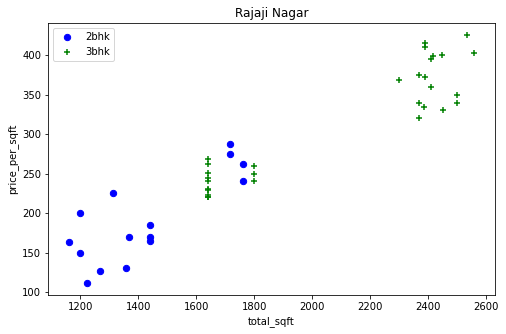

In [50]:
plot_scatter_chart(df6,'Rajaji Nagar')

In [21]:
df6.drop(['size','price_per_sqft'],axis=1,inplace=True)
df6.head(3)

NameError: name 'df6' is not defined

### converting text into dummies

In [20]:
dummies=pd.get_dummies(df6.location)
df7=pd.concat([df6,dummies.drop('others',axis='columns')],axis='columns')
df7.drop('location',axis=1,inplace=True)
df7.head(3)

NameError: name 'df6' is not defined

## model building

In [25]:
X=df7.drop('price',axis=1)
y=df7['price']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [27]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [28]:
lm.fit(X_train,y_train)
lm.score(X_test,y_test)

0.8421587825045275

In [29]:
#shuffle fold method
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.87983566, 0.83852359, 0.8513632 , 0.88848375, 0.80174811])

In [30]:
#supplying outside data
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
        
    return lm.predict([x])[0]    

In [31]:
predict_price('Indira Nagar',1000,2,2)

C:\Users\vikram vishnoi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


194.1779093224008

In [32]:
predict_price('Indira Nagar',1100,3,3)

C:\Users\vikram vishnoi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


202.95181826765258

### Exporting Model in Python flask

In [35]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lm,f)

In [36]:
import json
columns={
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))